## Tarea 4 - Ejercicio 1

Estudiante: Rodrigo Mauricio Garcia Saenz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Load training data and testing data
train = np.genfromtxt('DigitsTraining.csv', delimiter=',')
test = np.genfromtxt('DigitsTesting.csv', delimiter=',')


#Pre-processing data into data labels and data
X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]


#To plot line y = ax + b
def line(w, data=None):
    a = - w[1] / w[2]
    b = - w[0] / w[2]
    x_line = np.linspace(0.4, 1, 100)
    if data is not None:
        return a*data + b
    else:
        return a*x_line + b

def symmetry(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
   
    differenceH = np.abs(X - np.fliplr(X))
    differenceV = np.abs(X - np.flipud(X))
    symm = -np.mean([differenceH,differenceV])


    return symm





In [3]:
# Prepare Training Data for non 1's and 1's 
#Extract the Digit1 and Digit2 from the data
Digit1 = X_train[y_train != 1] # todos los que no son 1
y_train_Digit1 = np.ones(len(Digit1))
Digit2 = X_train[y_train == 1] # todos los que son 1
y_train_Digit2 = -np.ones(len(Digit2))


symm_Digit2 = [symmetry(im) for im in Digit2]
symm_Digit1 = [symmetry(im) for im in Digit1]

#Calculate averages and symmetries of the digits in training data
avg_intensity_Digit1 = np.mean(Digit1, axis = 1)
avg_intensity_Digit2 = np.mean(Digit2, axis = 1)


#Concatenate the intensities and symmetry
new_Digit1 = np.c_[avg_intensity_Digit1, symm_Digit1]
new_Digit2 = np.c_[avg_intensity_Digit2, symm_Digit2]


#Stack all the data together and randomize their locations.
X_new = np.r_[new_Digit1, new_Digit2]
y_new = np.r_[y_train_Digit1, y_train_Digit2]
R_num = np.random.randint(X_new.shape[0], size = (X_new.shape[0],))
X_new = X_new[R_num]
y_new = y_new[R_num]


In [4]:
#Prepare the test data for non 1's and 1's 
X_test_Digit1 = X_test[y_test != 1]
y_test_Digit1 = np.ones(len(X_test_Digit1))
X_test_Digit2 = X_test[y_test == 1]
y_test_Digit2 = -np.ones(len(X_test_Digit2))

X_test_new = np.r_[X_test_Digit1, X_test_Digit2]
y_test_new = np.r_[y_test_Digit1, y_test_Digit2]

R = np.random.randint(X_test_new.shape[0], size = (X_test_new.shape[0],))

X_test_new = X_test_new[R]
y_test_new = y_test_new[R]

#Calculate averages and symmetries of the digits in testing data

avg_int_test = np.mean(X_test_new, axis = 1)


test_symm = [symmetry(im) for im in X_test_new]


X_test_final = np.c_[avg_int_test, test_symm]



In [5]:
# Linear Regression
def lin(input_data,y,input_data_test,y_test,):
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]

    
    X_pseudo = np.linalg.inv(data.T @ data) @ data.T
    W_lin = X_pseudo @ y

    Y_pred = np.sign(data @ W_lin)
    Ein = (1/len(Y_pred)) * np.sum(np.square(Y_pred - y))

    Y_pred_test = np.sign(data_test @ W_lin)
    Eout = (1/len(Y_pred_test)) * np.sum(np.square(Y_pred_test - y_test))
    
    
    
    return Ein,Eout,W_lin


Ein: 0.06089699629680428
Eout: 0.09765819631290483
w: [ 0.47543795 -1.02896099 -4.77575982]


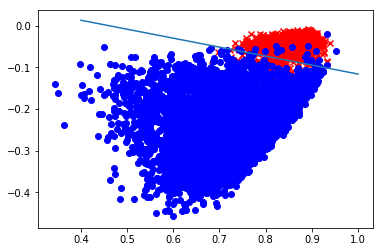

In [22]:
Ein, Eout,w = lin(X_new, y_new,X_test_final,y_test_new)
print('Ein:', Ein)
print('Eout:', Eout)
print('w:', w)

x_line = np.linspace(0.4, 1, 100)

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()

In [19]:
# Non Linear Regression
def nonlin(input_data,y,input_data_test,y_test,):

    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]

    # aplicando transormación no lineal en x
    x1x2 = data[:, 1] * data[:, 2]
    x1Cuadrado = np.square(data[:, 1])
    x2Cuadrado = np.square(data[:, 2])
    # z = (1, x1, x2, x1x2, x1^2, x2^2)
    z = np.c_[data[:,0], data[:,1], data[:, 2], \
              x1x2.reshape(-1, 1), x1Cuadrado.reshape(-1, 1), x2Cuadrado.reshape(-1, 1)]
    
    # aplicando regresion lineal pero a la transformación z
    X_pseudo = np.linalg.inv(z.T @ z) @ z.T
    W_Nlin = X_pseudo @ y
    # predicciones
    Y_pred = np.sign(z @ W_Nlin)
    Ein = (1/len(Y_pred)) * np.sum(np.square(Y_pred - y))

    # aplicando transformación no lineal en x_test
    x1x2 = data_test[:, 1] * data_test[:, 2]
    x1Cuadrado = np.square(data_test[:, 1])
    x2Cuadrado = np.square(data_test[:, 2])
    # z = (1, x1, x2, x1x2, x1^2, x2^2)
    z_test = np.c_[data_test[:,0], data_test[:,1], data_test[:, 2], \
                   x1x2.reshape(-1,1), x1Cuadrado.reshape(-1,1), x2Cuadrado.reshape(-1,1)]
    X_pseudo_test = np.linalg.inv(z_test.T @ z_test) @ z_test.T
    W_Nlin = X_pseudo_test @ y_test
    
    Y_pred_test = np.sign(z_test @ W_Nlin)
    Eout = (1/len(Y_pred_test)) * np.sum(np.square(Y_pred_test - y_test))
    
    return Ein,Eout,W_Nlin

In [80]:
Ein, Eout,w = nonlin(X_new, y_new,X_test_final,y_test_new)
print('Ein:', Ein)
print('Eout:', Eout)
print('w:', w)

Ein: 0.054862158825949796
Eout: 0.0817140009965122
w: [  3.3290427   -9.45546177  -7.14349116 -11.11869296   4.64622906
 -26.44691592]


Comparando errores de predicciones $E_{in_{1}}$ (*in-sample*) de la regresión lineal con los $E_{in_{2}}$ de la regresión no lineal, vemos:

- $E_{in_{1}} = 0.06$ y $E_{in_{2}} = 0.054$ tiene una diferencia de 0.006 que los hace muy cercanos

Comparando errores de predicciones $E_{out_{1}}$ (*out-of-sample*) de la regresión lineal con los $E_{out_{2}}$ de la regresión no lineal, vemos:

- $E_{out_{1}} = 0.097$ y $E_{out_{2}} = 0.081$ diferencia de 0.0159 que los hace cercanos

Sin embargo también vemos que la regresión lineal tiene errores de predicciones *in-sample* y *out-of-sample* ($E_{in}$ y $E_{out}$ respectivamente) un poco mayores, lo que indica que hace predicciones ligeramente inferiores que la regresión no lineal en este caso.

In [85]:
print( 0.06089699629680428 - 0.054862158825949796)
print(0.09765819631290483 -0.0817140009965122)

0.006034837470854482
0.01594419531639263


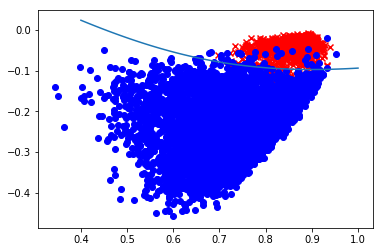

In [83]:
# graficando para visualizar la clasificación
r = np.linspace(0.4, 1, 100)
# w tiene 6 coeficientes y con relacion a x es
#w0z0 + (w1)z1 + w2^2 z2

aux = (((r*w[3])+w[2])**2)/(4*w[5]**2)
aux = aux - ((w[0]+(r*w[1])+(w[4]*r**2))/w[5])
raiz = np.sqrt(aux)
yres = raiz - (((r*w[3])+w[2])/(2*w[5]))

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, yres)
plt.show()